In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Load dữ liệu
url = "https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv"
df = pd.read_csv(url)

# Lọc các cột số
numeric_df = df.select_dtypes(include=["number"])
numeric_df


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,9.038462,1,0


In [14]:
# Lấy danh sách các biến có ảnh hưởng đến giá (price)
important_vars = ["price", "engine-size", "horsepower",
                  "curb-weight", "city-mpg", "highway-mpg",
                  "normalized-losses"]

# Loại bỏ các giá trị NaN để scaler không lỗi
data = df[important_vars].dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Tạo DataFrame mới với dữ liệu chuẩn hóa
scaled_df = pd.DataFrame(scaled_data, columns=important_vars)


<Figure size 1500x800 with 0 Axes>

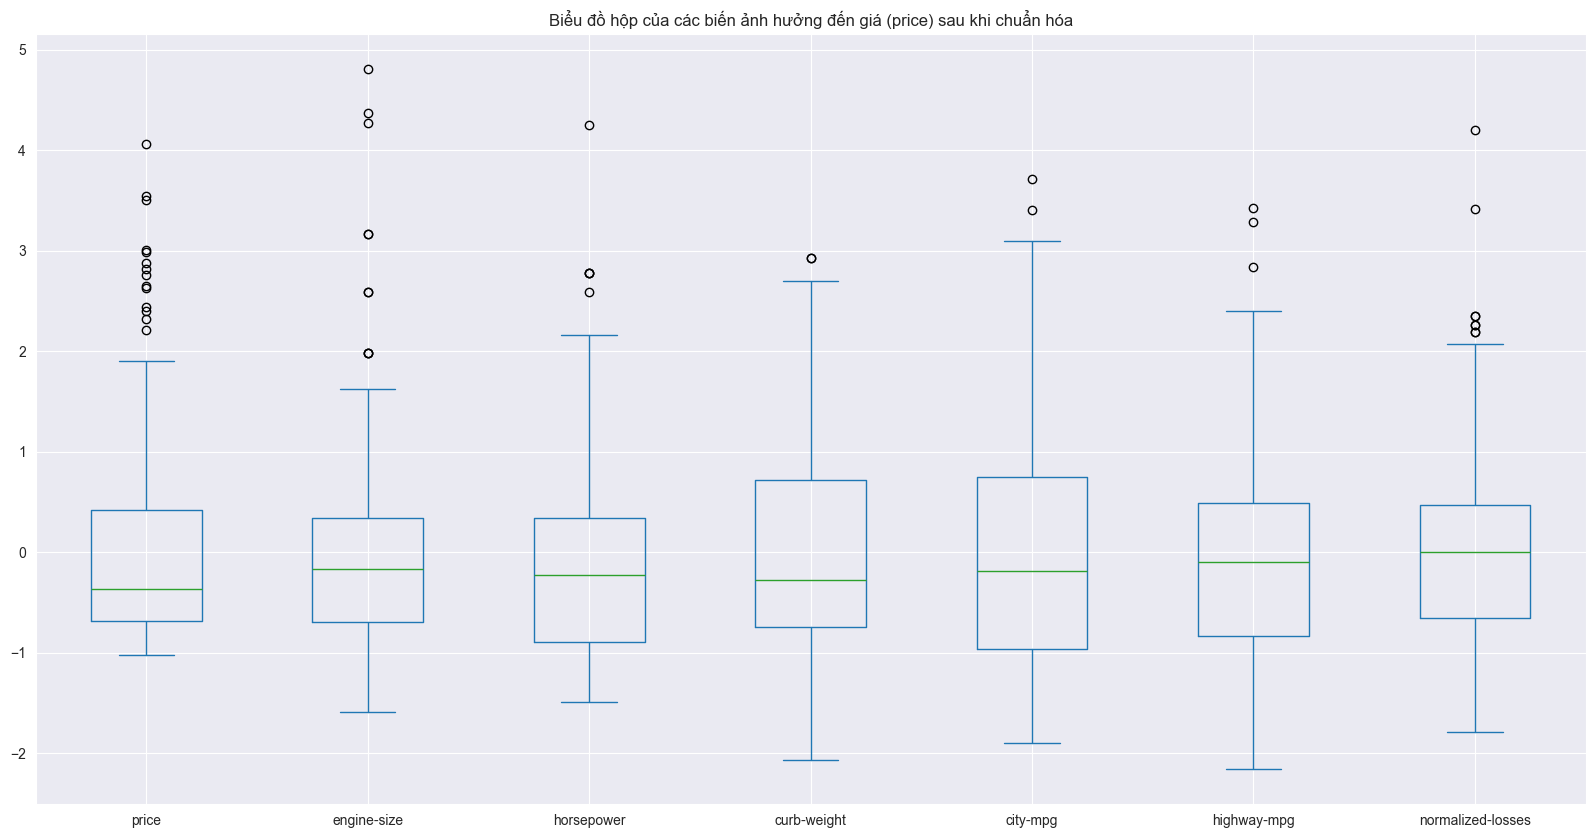

In [16]:
# Vẽ boxplot sau khi chuẩn hóa
plt.figure(figsize=(15, 8))
scaled_df.plot(kind="box", figsize=(20,10), title="Biểu đồ hộp của các biến ảnh hưởng đến giá (price) sau khi chuẩn hóa")
plt.show()

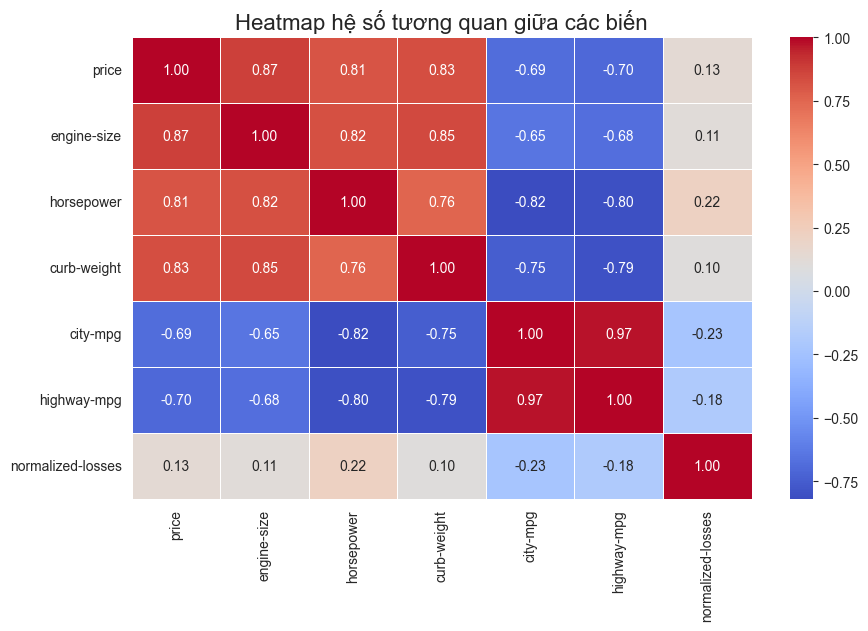

In [17]:
import seaborn as sns
# Vẽ heatmap
corr = data.corr() # Tính ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap hệ số tương quan giữa các biến", fontsize=16)
plt.show()

##### engine-size, horsepower, curb-weight → tương quan thuận mạnh với price.
##### city-mpg, highway-mpg → tương quan nghịch mạnh với price (mpg cao thì giá thấp).
##### normalized-losses → tương quan rất yếu, ít ảnh hưởng.
##### city-mpg và highway-mpg trùng lặp thông tin (tương quan ~0.97).

In [ ]:
# Kiểm tra “drive-wheels” / “make” có ảnh hưởng đến price không?
df_test = df[['drive-wheels', 'make', 'price']]
df_grouped = df_test.groupby(['drive-wheels', 'make'], as_index=False).mean()
df_grouped

,drive-wheels,make,price
0,4wd,audi,17450.000000
1,4wd,subaru,9560.400000
2,4wd,toyota,8338.000000
3,fwd,audi,17941.000000
4,fwd,chevrolet,6007.000000
5,fwd,dodge,7875.444444
6,fwd,honda,8184.692308
7,fwd,mazda,8399.545455
8,fwd,mitsubishi,9239.769231
9,fwd,nissan,8812.333333


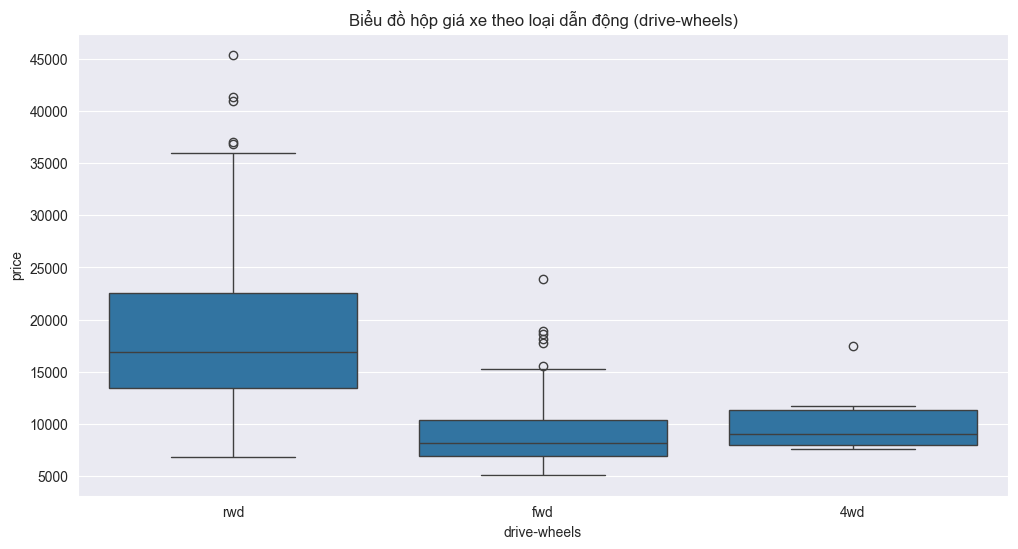

In [19]:
# Vẽ Boxplot cho drive-wheels và price
plt.figure(figsize=(12, 6))
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.title("Biểu đồ hộp giá xe theo loại dẫn động (drive-wheels)")
plt.show()

In [21]:
# Thống kê anova-f, p-value cho drive-wheels
from scipy import stats
grouped_data = [group["price"].values for name, group in df.groupby("drive-wheels")]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 67.95406500780399, p-value: 3.3945443577149576e-23


##### Kết luận: p-value < 0.05 → drive-wheels có ảnh hưởng đáng kể đến price.

In [23]:
# Giá trung bình theo drive-wheels
group_means = df[['drive-wheels','price']].groupby('drive-wheels').mean().sort_values('price')
print(group_means)


                     price
drive-wheels              
fwd            9244.779661
4wd           10241.000000
rwd           19757.613333


In [36]:
# Gom drive-wheels thành 2 nhóm
def simplify_drive_wheels(x):
    if x == "fwd":
        return "low_price_group"
    else:  # rwd hoặc 4wd
        return "high_price_group"

df["drive_wheels_grouped"] = df["drive-wheels"].apply(simplify_drive_wheels)

print(df[["drive-wheels","drive_wheels_grouped","price"]].head(10)) # Lấy 10 dòng đầu để kiểm tra

  drive-wheels drive_wheels_grouped  price
0          rwd     high_price_group  13495
1          rwd     high_price_group  16500
2          rwd     high_price_group  16500
3          fwd      low_price_group  13950
4          4wd     high_price_group  17450
5          fwd      low_price_group  15250
6          fwd      low_price_group  17710
7          fwd      low_price_group  18920
8          fwd      low_price_group  23875
9          rwd     high_price_group  16430


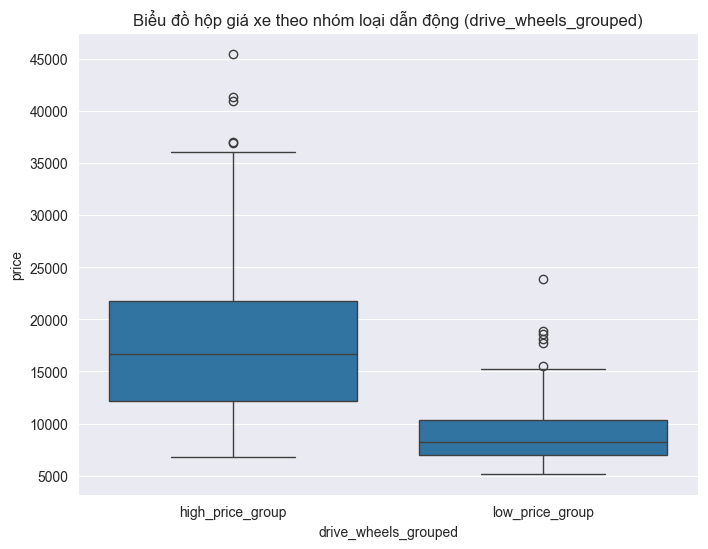

In [37]:
# Vẽ Boxplot cho drive_wheels_grouped và price
plt.figure(figsize=(8, 6))
sns.boxplot(x='drive_wheels_grouped', y='price', data=df)
plt.title("Biểu đồ hộp giá xe theo nhóm loại dẫn động (drive_wheels_grouped)")
plt.show()

##### Kết luận: Nhóm dẫn động cầu trước (fwd) có giá thấp hơn đáng kể so với nhóm còn lại.

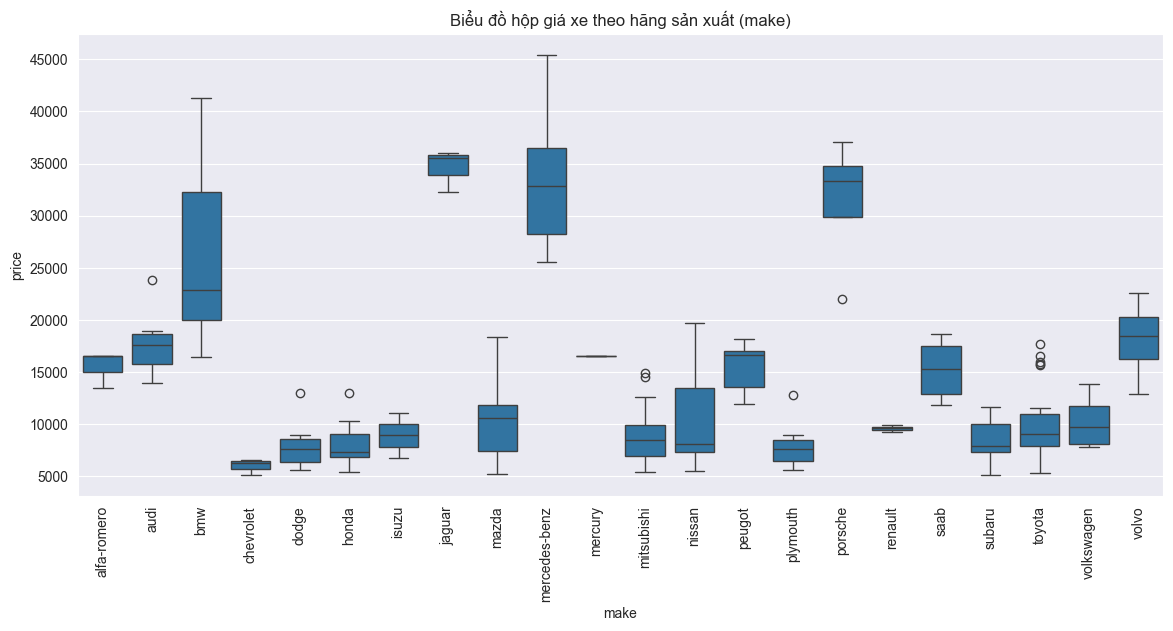

In [20]:
# Vẽ Boxplot cho make và price
plt.figure(figsize=(14,6))
sns.boxplot(x="make", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Biểu đồ hộp giá xe theo hãng sản xuất (make)")
plt.show()

In [22]:
# Thống kê anova-f, p-value cho make
grouped_data_make = [group["price"].values for name, group in df.groupby("make")]
f_stat_make, p_value_make = stats.f_oneway(*grouped_data_make)
print(f"F-statistic (make): {f_stat_make}, p-value (make): {p_value_make}")

F-statistic (make): 33.23210250666057, p-value (make): 1.0683425287773982e-50


##### Kết luận: p-value < 0.05 → make có ảnh hưởng đáng kể đến price.

In [26]:
# Giá trung bình theo make
group_means_make = df[['make','price']].groupby('make').mean().sort_values('price')
print(group_means_make)

                      price
make                       
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
toyota          9885.812500
volkswagen     10077.500000
nissan         10415.666667
mazda          10652.882353
saab           15223.333333
peugot         15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166667
volvo          18063.181818
bmw            26118.750000
porsche        31400.500000
mercedes-benz  33647.000000
jaguar         34600.000000


In [27]:
# Thực hiện phân loại make thành 3 nhóm
def categorize_make(x):
    low = ['chevrolet', 'dodge', 'honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'plymouth', 'subaru', 'toyota', 'volkswagen']
    medium = ['audi', 'bmw', 'buick', 'cadillac', 'chrysler', 'jaguar', 'mercedes-benz', 'peugeot', 'saab']
    high = ['alfa-romero', 'aston-martin', 'ferrari', 'lamborghini', 'porsche', 'rolls-royce']
    if x in low:
        return 'low_price_group' # Hãng bình dân
    elif x in medium:
        return 'medium_price_group' # Hãng tầm trung
    elif x in high:
        return 'high_price_group' # Hãng cao cấp
    else:
        return 'other' # Hãng khác

df['make_grouped'] = df['make'].apply(categorize_make)
print(df[['make', 'make_grouped', 'price']].head(10)) # Lấy 10 dòng đầu để kiểm tra

          make        make_grouped  price
0  alfa-romero    high_price_group  13495
1  alfa-romero    high_price_group  16500
2  alfa-romero    high_price_group  16500
3         audi  medium_price_group  13950
4         audi  medium_price_group  17450
5         audi  medium_price_group  15250
6         audi  medium_price_group  17710
7         audi  medium_price_group  18920
8         audi  medium_price_group  23875
9          bmw  medium_price_group  16430


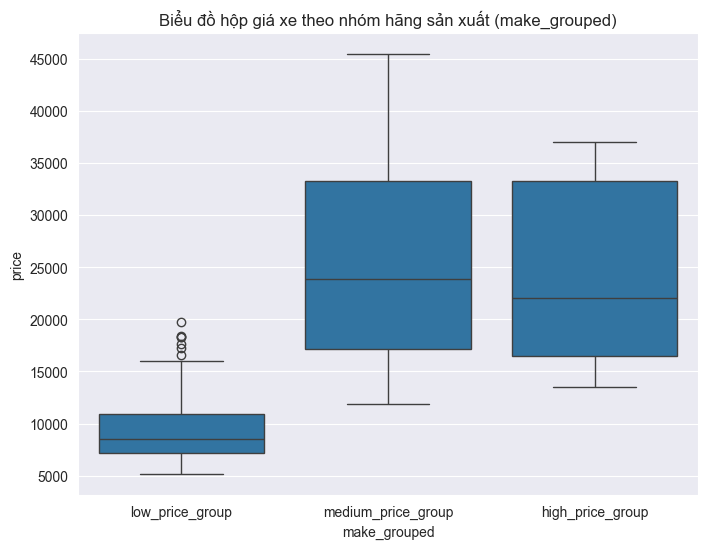

In [38]:
# Vẽ Boxplot cho make_grouped và price
plt.figure(figsize=(8, 6))
sns.boxplot(x='make_grouped', y='price', data=df, order=['low_price_group', 'medium_price_group', 'high_price_group'])
plt.title("Biểu đồ hộp giá xe theo nhóm hãng sản xuất (make_grouped)")
plt.show()

##### Kết luận: Nhóm hãng bình dân có giá thấp hơn đáng kể so với nhóm tầm trung và cao cấp.